In [1]:

from dust3r.inference import inference, load_model
from dust3r.utils.image import load_images
from dust3r.image_pairs import make_pairs
from dust3r.cloud_opt import global_aligner, GlobalAlignerMode, PointCloudOptimizer, GALossRecorder


import os
import glob


model_path = "checkpoints/DUSt3R_ViTLarge_BaseDecoder_512_dpt.pth"
device = 'cuda'
batch_size = 1
schedule = 'cosine'
lr = 0.01
niter = 300


def calculate_final_loss(img_lst, save_log = ""):

    model = load_model(model_path, device)
    # load_images can take a list of images or a directory
    images = load_images(img_lst, size=512)
    pairs = make_pairs(images, scene_graph='complete', prefilter=None, symmetrize=True)
    output = inference(pairs, model, device, batch_size=batch_size)

    # scene = global_aligner(output, device=device, mode=GlobalAlignerMode.PointCloudOptimizer)
    scene = global_aligner(output, device=device, mode=GlobalAlignerMode.GALossRecorder)
    loss= scene.compute_global_alignment(init="mst", niter=niter, schedule=schedule, lr=lr)
    # if len(save_log) != 0:
    #     scene.save_loss(save_log)
    return scene, loss


img_lst = ['IMG_9597_test.jpg', 'IMG_9598_test.jpg', 'IMG_9599_test.jpg', 'IMG_9600_test.jpg', 'IMG_9601_test.jpg']
img_lst_dst = ['IMG_9597_test.jpg', 'IMG_9598_test.jpg', 'IMG_9599_test.jpg', 'IMG_9600_test.jpg', 'red_car_test.jpg' ]

scene, loss = calculate_final_loss(img_lst)
scene_dst, loss_dst = calculate_final_loss(img_lst_dst)

loss, loss_dst
# visualize reconstruction
# scene.show()


Warning, cannot find cuda-compiled version of RoPE2D, using a slow pytorch version instead
... loading model from checkpoints/DUSt3R_ViTLarge_BaseDecoder_512_dpt.pth
instantiating : AsymmetricCroCo3DStereo(enc_depth=24, dec_depth=12, enc_embed_dim=1024, dec_embed_dim=768, enc_num_heads=16, dec_num_heads=12, pos_embed='RoPE100', patch_embed_cls='PatchEmbedDust3R', img_size=(512, 512), head_type='dpt', output_mode='pts3d', depth_mode=('exp', -inf, inf), conf_mode=('exp', 1, inf), landscape_only=False)
<All keys matched successfully>
>> Loading a list of 5 images
 - adding IMG_9597_test.jpg with resolution 240x320 --> 384x512
 - adding IMG_9598_test.jpg with resolution 240x320 --> 384x512
 - adding IMG_9599_test.jpg with resolution 240x320 --> 384x512
 - adding IMG_9600_test.jpg with resolution 240x320 --> 384x512
 - adding IMG_9601_test.jpg with resolution 240x320 --> 384x512
 (Found 5 images)
>> Inference with model on 20 image pairs


100%|███████████████████████████████████████████| 20/20 [00:08<00:00,  2.48it/s]


 init edge (1*,2*) score=92.1064453125
 init edge (1,0*) score=74.48174285888672
 init edge (2,3*) score=69.31718444824219
 init edge (1,4*) score=62.85211181640625
 init loss = 0.01688092015683651
Global alignement - optimizing for:
['pw_poses', 'im_depthmaps', 'im_poses', 'im_focals', 'im_conf.0', 'im_conf.1', 'im_conf.2', 'im_conf.3', 'im_conf.4']


100%|██████████████████| 300/300 [00:20<00:00, 14.48it/s, lr=0.01 loss=0.010218]


... loading model from checkpoints/DUSt3R_ViTLarge_BaseDecoder_512_dpt.pth
instantiating : AsymmetricCroCo3DStereo(enc_depth=24, dec_depth=12, enc_embed_dim=1024, dec_embed_dim=768, enc_num_heads=16, dec_num_heads=12, pos_embed='RoPE100', patch_embed_cls='PatchEmbedDust3R', img_size=(512, 512), head_type='dpt', output_mode='pts3d', depth_mode=('exp', -inf, inf), conf_mode=('exp', 1, inf), landscape_only=False)
<All keys matched successfully>
>> Loading a list of 5 images
 - adding IMG_9597_test.jpg with resolution 240x320 --> 384x512
 - adding IMG_9598_test.jpg with resolution 240x320 --> 384x512
 - adding IMG_9599_test.jpg with resolution 240x320 --> 384x512
 - adding IMG_9600_test.jpg with resolution 240x320 --> 384x512
 - adding red_car_test.jpg with resolution 1080x673 --> 512x304
 (Found 5 images)
>> Inference with model on 20 image pairs


100%|███████████████████████████████████████████| 20/20 [00:07<00:00,  2.66it/s]


 init edge (1*,2*) score=92.1064453125
 init edge (1,0*) score=74.48174285888672
 init edge (2,3*) score=69.31718444824219
 init edge (3,4*) score=2.162449598312378
 init loss = 0.03472132980823517
Global alignement - optimizing for:
['pw_poses', 'im_depthmaps', 'im_poses', 'im_focals', 'im_conf.0', 'im_conf.1', 'im_conf.2', 'im_conf.3', 'im_conf.4']


100%|████████████████| 300/300 [00:20<00:00, 14.39it/s, lr=0.01 loss=0.00749619]


(0.01021798886358738, 0.007496194448322058)

********************step 0 loss********************


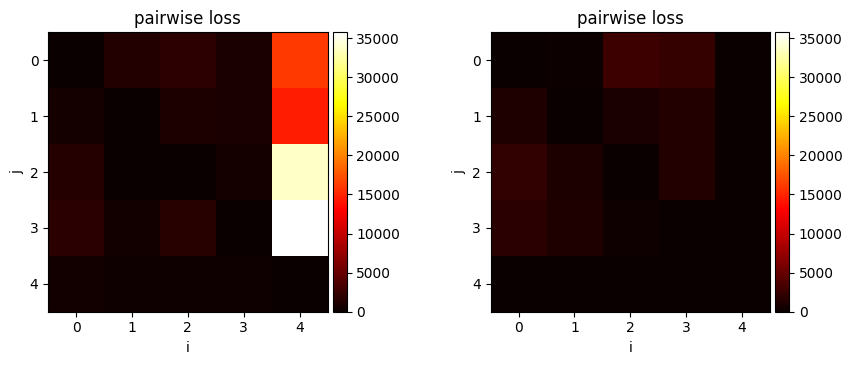

********************step 80 loss********************


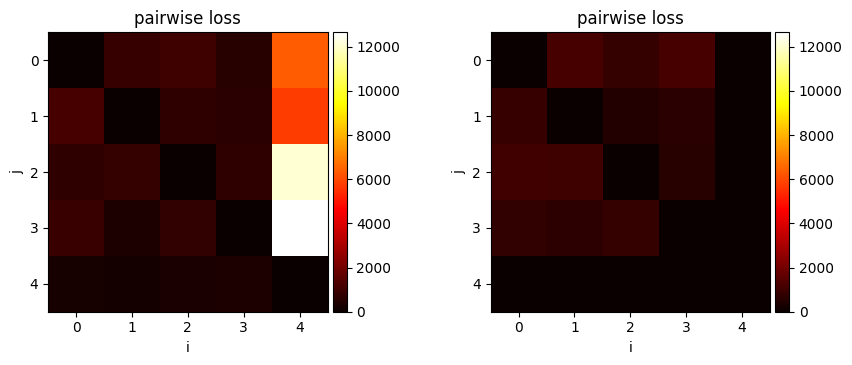

********************step 160 loss********************


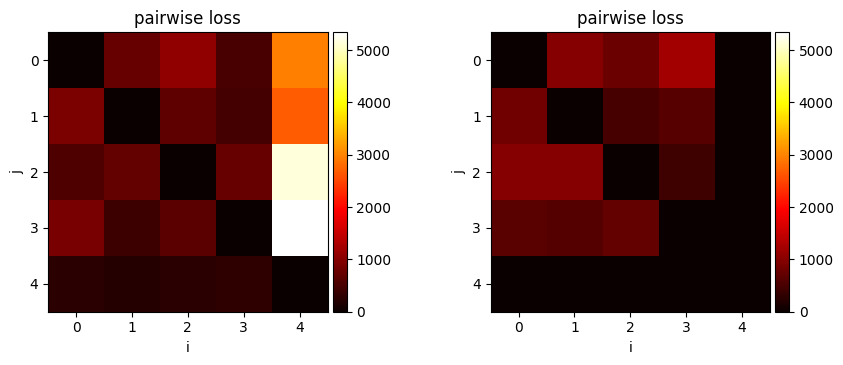

********************step 240 loss********************


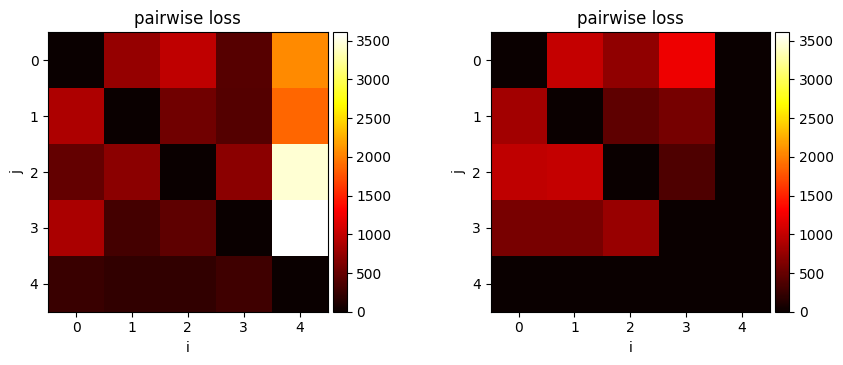

In [13]:
import numpy as np
import matplotlib.pyplot as plt
ls_dst = np.array(scene_dst.loss_log)
ls = np.array(scene.loss_log)

for i in range(300):
    if i % 80 ==0:
        
        print("*"*20+ "step "+ str(i) + " loss" + "*"*20)

        vmin, vmax = plot_heatmap_loss(ls_dst [i,:,:4])
        # _, _ = plot_heatmap_loss(ls[i,:,:], vmin, vmax)

In [25]:
# ls_dst 
ls_dst.shape
conf_idx = np.array([0,1,4,5])
ls_dst[1,:,[0,1,4,5]].T


array([[1.00000000e+00, 0.00000000e+00, 4.05180500e+05, 3.88376625e+05],
       [2.00000000e+00, 0.00000000e+00, 4.00835312e+05, 3.08462531e+05],
       [2.00000000e+00, 1.00000000e+00, 3.94386875e+05, 2.90870688e+05],
       [3.00000000e+00, 0.00000000e+00, 3.80317375e+05, 3.11310250e+05],
       [3.00000000e+00, 1.00000000e+00, 3.77833000e+05, 3.17830969e+05],
       [3.00000000e+00, 2.00000000e+00, 3.83407219e+05, 3.66953094e+05],
       [4.00000000e+00, 0.00000000e+00, 4.44367031e+04, 2.14307904e-01],
       [4.00000000e+00, 1.00000000e+00, 4.01867305e+04, 2.12430246e-02],
       [4.00000000e+00, 2.00000000e+00, 7.58762734e+04, 5.88259816e-01],
       [4.00000000e+00, 3.00000000e+00, 7.88791719e+04, 6.43768251e-01],
       [0.00000000e+00, 1.00000000e+00, 4.20062938e+05, 3.65775875e+05],
       [0.00000000e+00, 2.00000000e+00, 4.17037250e+05, 3.72492500e+05],
       [1.00000000e+00, 2.00000000e+00, 4.31165875e+05, 4.04433000e+05],
       [0.00000000e+00, 3.00000000e+00, 4.08970500e

********************step 0 loss********************


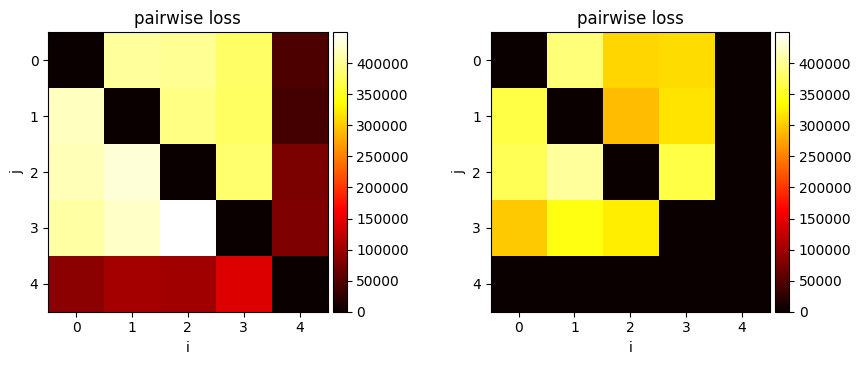

********************step 50 loss********************


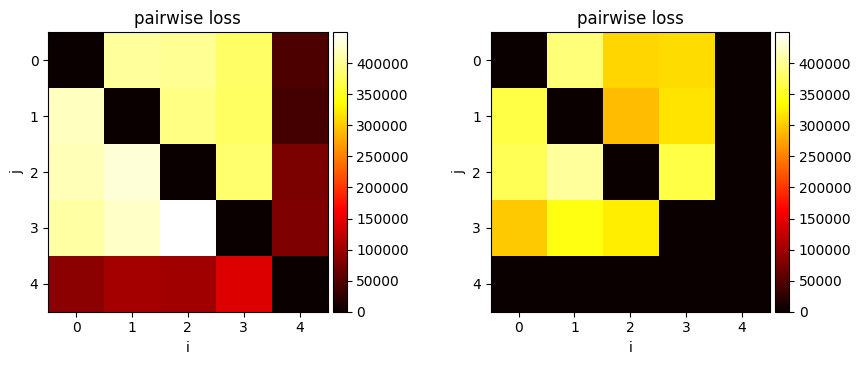

********************step 100 loss********************


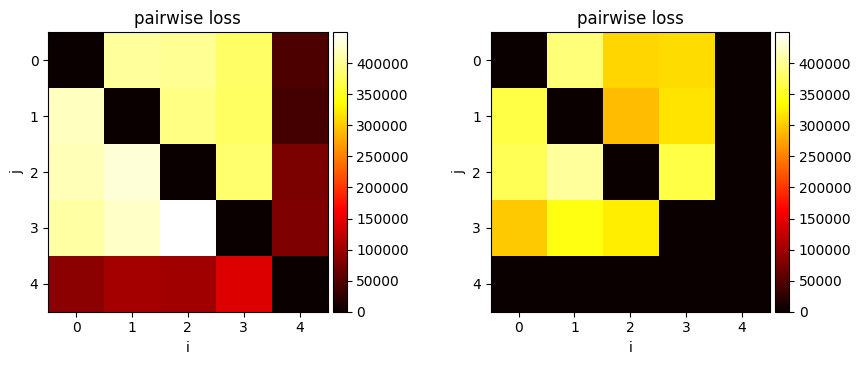

********************step 150 loss********************


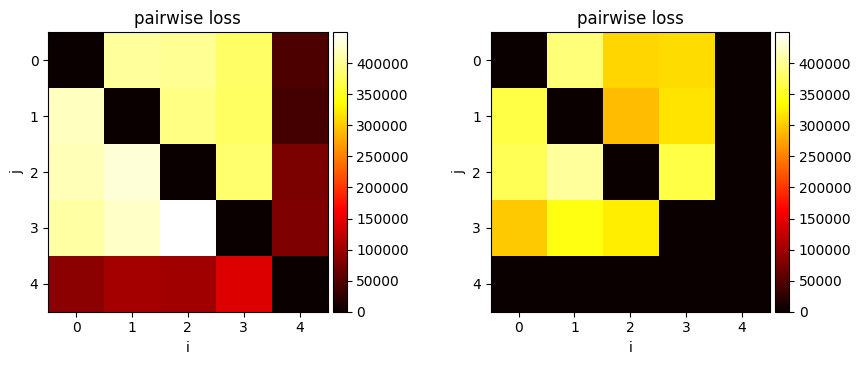

********************step 200 loss********************


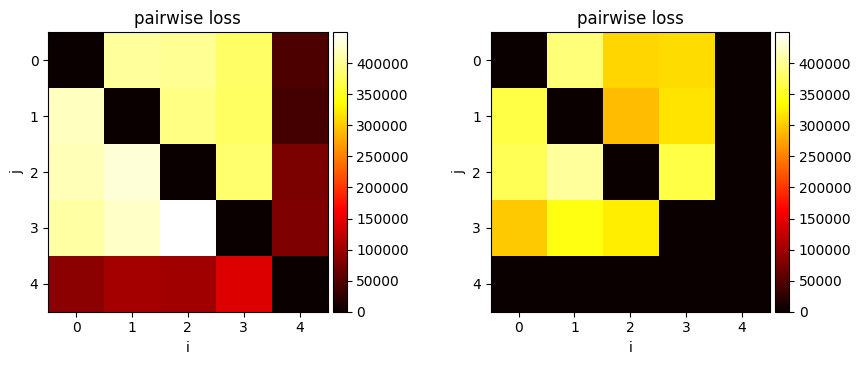

********************step 250 loss********************


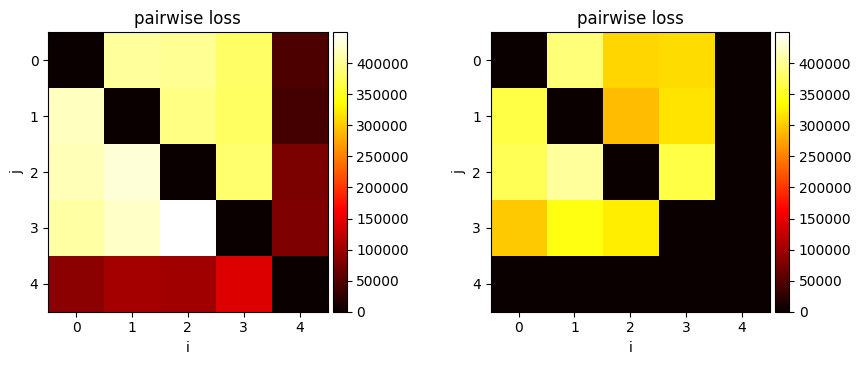

In [29]:

for i in range(300):
    if i % 50 ==0:
        
        print("*"*20+ "step "+ str(i) + " loss" + "*"*20)

        vmin, vmax = plot_heatmap_loss(ls_dst [i,:,[0,1,4,5]].T)
        # _, _ = plot_heatmap_loss(ls[i,:,:], vmin, vmax)

In [3]:


def plot_heatmap_loss(data, vmin = -1, vmax = -1):

    """
    data: (i, j, i_loss, j_loss)
    """
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    
    heatmap1 = np.zeros((5, 5))
    heatmap2 = np.zeros((5, 5))
    
    # Populate heatmaps with data
    for x, y, value1, value2 in data:
        heatmap1[int(y), int(x)] = value1
        heatmap2[int(y), int(x)] = value2

    if vmin < 0 or vmax < 0: 
        # Calculate vmin and vmax for both heatmaps
        vmin = min(heatmap1.min(), heatmap2.min())
        vmax = max(heatmap1.max(), heatmap2.max())
    
    # Plot heatmaps
    fig, axs = plt.subplots(1, 2, figsize=(12*0.75, 5*0.75))  # Create figure with two subplots
    
    # Plot heatmap 1
    im1 = axs[0].imshow(heatmap1, cmap='hot', interpolation='nearest', vmin=vmin, vmax=vmax)
    axs[0].set_title('pairwise loss')
    axs[0].set_xlabel('i')
    axs[0].set_ylabel('j')
    
    # Plot heatmap 2
    im2 = axs[1].imshow(heatmap2, cmap='hot', interpolation='nearest', vmin=vmin, vmax=vmax)
    axs[1].set_title('pairwise loss')
    axs[1].set_xlabel('i')
    axs[1].set_ylabel('j')
    
    # Add colorbars
    divider = make_axes_locatable(axs[0])
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im1, cax=cax1)
    
    divider = make_axes_locatable(axs[1])
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im2, cax=cax2)
    
    plt.tight_layout()
    plt.show()
    return vmin, vmax

In [24]:
# focals, poses, pts3d
pw_poses = scene.get_pw_poses()  # cam-to-world
pw_adapt = scene.get_adaptors()
proj_pts3d = scene.get_pts3d()
# pre-compute pixel weights, those confidence scores
weight_i = {i_j: scene.conf_trf(c) for i_j, c in scene.conf_i.items()}
weight_j = {i_j: scene.conf_trf(c) for i_j, c in scene.conf_j.items()}



In [25]:
pw_poses.shape, len(proj_pts3d), proj_pts3d[0].shape

(torch.Size([30, 4, 4]), 6, torch.Size([512, 384, 3]))

In [62]:

loss

0.005976559594273567

found 58127 matches


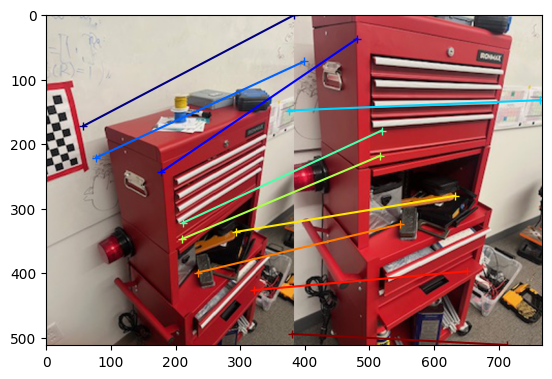

In [23]:

    # find 2D-2D matches between the two images
    from dust3r.utils.geometry import find_reciprocal_matches, xy_grid
    pts2d_list, pts3d_list = [], []
    for i in range(2):
        conf_i = confidence_masks[i].cpu().numpy()
        pts2d_list.append(xy_grid(*imgs[i].shape[:2][::-1])[conf_i])  # imgs[i].shape[:2] = (H, W)
        pts3d_list.append(pts3d[i].detach().cpu().numpy()[conf_i])
    reciprocal_in_P2, nn2_in_P1, num_matches = find_reciprocal_matches(*pts3d_list)
    print(f'found {num_matches} matches')
    matches_im1 = pts2d_list[1][reciprocal_in_P2]
    matches_im0 = pts2d_list[0][nn2_in_P1][reciprocal_in_P2]

    # visualize a few matches
    import numpy as np
    from matplotlib import pyplot as pl
    n_viz = 10
    match_idx_to_viz = np.round(np.linspace(0, num_matches-1, n_viz)).astype(int)
    viz_matches_im0, viz_matches_im1 = matches_im0[match_idx_to_viz], matches_im1[match_idx_to_viz]

    H0, W0, H1, W1 = *imgs[0].shape[:2], *imgs[1].shape[:2]
    img0 = np.pad(imgs[0], ((0, max(H1 - H0, 0)), (0, 0), (0, 0)), 'constant', constant_values=0)
    img1 = np.pad(imgs[1], ((0, max(H0 - H1, 0)), (0, 0), (0, 0)), 'constant', constant_values=0)
    img = np.concatenate((img0, img1), axis=1)
    pl.figure()
    pl.imshow(img)
    cmap = pl.get_cmap('jet')
    for i in range(n_viz):
        (x0, y0), (x1, y1) = viz_matches_im0[i].T, viz_matches_im1[i].T
        pl.plot([x0, x1 + W0], [y0, y1], '-+', color=cmap(i / (n_viz - 1)), scalex=False, scaley=False)
    pl.show(block=True)

In [64]:
import os
import glob

def get_image_names(directory):
    """
    Get a list of image file names (without directory path) in the specified directory.

    Args:
        directory (str): The path to the directory containing the image files.

    Returns:
        list: A list of image file names.
    """
    image_names = []
    supported_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp']  # Add more extensions if needed

    for extension in supported_extensions:
        files = glob.glob(os.path.join(directory, extension))
        image_names.extend([os.path.basename(file) for file in files])

    return image_names

# Example usage:
directory_path = '~/dust3r/'
image_names = get_image_names(directory_path)